# 專題分析 - CNN For MNIST

In [1]:
import numpy as np
from keras.datasets import mnist

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

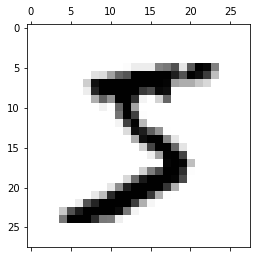

In [4]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# Input shape format: (28, 28, 1)
# If 128x128 RGB, (128,128,3)
X_train = X_train.reshape(X_train.shape[0],28,28,1) / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1) / 255

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
# one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)

# Convolution layer

In [36]:
model = Sequential()

#Conv2D
#filters: 濾鏡數量/kernel_size: 濾鏡大小/strides: 步幅(width, height)或單一數值
#padding: 'same'-與input shape相同, 'valid'-不使用padding/input_shape: 當Conv2D是Sequential第一層時要加上的參數
    

model.add(Conv2D(filters=32, kernel_size=(10,10), padding='same', input_shape=(28,28,1), activation='relu'))

In [37]:
prediction = model.predict_classes(X_train[:1,:])

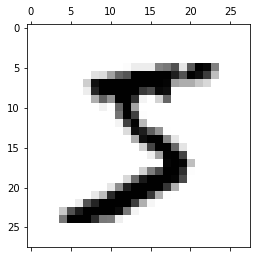

In [38]:
import matplotlib.pyplot as plt
train_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()

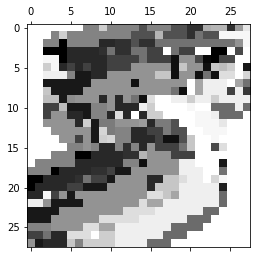

In [39]:
import matplotlib.pyplot as plt
cov_img = np.reshape(prediction[:1, :], (28, 28))
plt.matshow(cov_img, cmap = plt.get_cmap('binary'))
plt.show()

# Max-pooling layer

In [40]:
model = Sequential()
#pool_size: pool大小
model.add(Conv2D(filters=16,kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [41]:
prediction = model.predict_classes(X_train[:1,:])
prediction[:1,:]

array([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 13, 13, 13,  9, 11,  9,  9,  9,  0],
        [ 0,  0, 13, 13, 14, 14, 14, 13, 14, 13, 13,  8,  8,  0],
        [ 0,  0,  9, 13, 13, 13, 14, 13,  7,  7,  7,  7,  4,  0],
        [ 0,  0,  8, 15,  7,  7,  7,  7,  7,  7,  4,  4, 11,  0],
        [ 0,  0,  0,  0,  0,  7,  7,  4,  4,  4,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  8, 15,  7, 14, 14, 14, 11,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 15,  7,  7,  7, 14, 14,  3,  0,  0],
        [ 0,  0,  0,  0,  0, 13,  9, 11, 14,  7,  4,  8,  0,  0],
        [ 0,  0,  0, 13, 13,  9,  9,  8, 14,  7,  4, 11,  0,  0],
        [ 0, 13, 13, 14, 13, 15,  7,  7,  7,  7,  4, 11,  0,  0],
        [ 0, 10, 13, 13,  7,  7,  7,  7,  4, 11, 11,  0,  0,  0],
        [ 0,  5,  8,  7,  7,  7,  4,  4, 11,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 11, 11, 11, 11,  0,  0,  0,  0,  0,  0,  0]]])

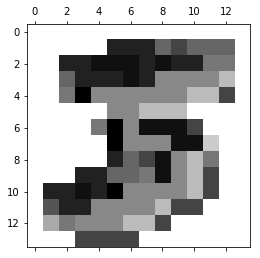

In [42]:
import matplotlib.pyplot as plt
max_pooling_img = np.reshape(prediction[:1, :], (14, 14))
plt.matshow(max_pooling_img, cmap = plt.get_cmap('binary'))
plt.show()

# CNN

In [43]:
model = Sequential()
# Conv + Max-pooling 1
model.add(Conv2D(filters=16,kernel_size=(10,10),padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv + Max-pooling 2
model.add(Conv2D(filters=36, kernel_size=(10,10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten層: 壓成一維
# Dense 接在內層不用input_dim，其他參數先用預設值
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        1616      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 36)        57636     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

In [45]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
history=model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=5, batch_size=300, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 326s 7ms/step - loss: 0.4497 - acc: 0.8579 - val_loss: 0.0938 - val_acc: 0.9717
Epoch 2/5
48000/48000 [==============================] - 325s 7ms/step - loss: 0.1272 - acc: 0.9619 - val_loss: 0.0582 - val_acc: 0.9823
Epoch 3/5
48000/48000 [==============================] - 325s 7ms/step - loss: 0.0867 - acc: 0.9749 - val_loss: 0.0493 - val_acc: 0.9844
Epoch 4/5
48000/48000 [==============================] - 325s 7ms/step - loss: 0.0682 - acc: 0.9797 - val_loss: 0.0450 - val_acc: 0.9875
Epoch 5/5
48000/48000 [==============================] - 327s 7ms/step - loss: 0.0571 - acc: 0.9828 - val_loss: 0.0419 - val_acc: 0.9873


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

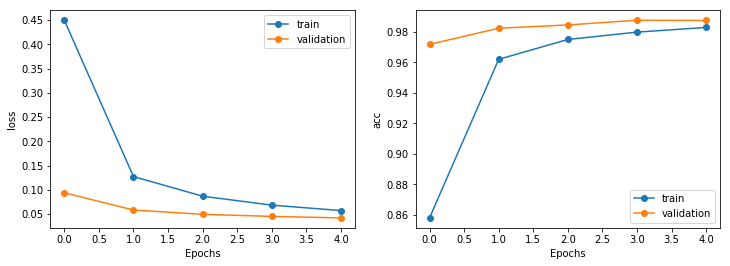

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [48]:
model.evaluate(X_train, y_train_onehot)

60000/60000 [==============================] - 133s 2ms/step


[0.031688393315013184, 0.99024999999999996]

## 預測-可以再自行用for-loop把錯誤/正確的資料一一顯示出來看

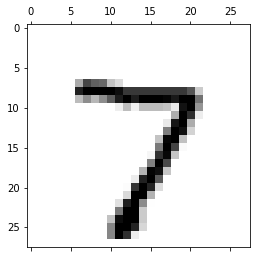

In [49]:
import matplotlib.pyplot as plt
test_img = np.reshape(X_test[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [50]:
model.predict_classes(X_test[:1,:])

array([7])

# softmax & prediction

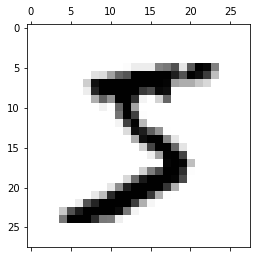

In [51]:
import matplotlib.pyplot as plt
test_img = np.reshape(X_train[:1, :], (28, 28))
plt.matshow(test_img, cmap = plt.get_cmap('binary'))
plt.show()

In [52]:
model.predict(X_train[:1,:])

array([[  7.19847790e-08,   7.11171367e-07,   8.71652901e-07,
          1.76009499e-02,   1.06659370e-09,   9.82278109e-01,
          3.06442672e-07,   5.14322778e-07,   9.56939184e-05,
          2.26607099e-05]], dtype=float32)

<BarContainer object of 10 artists>

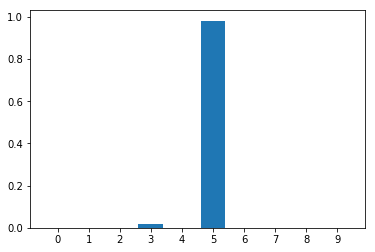

In [53]:
y = model.predict(X_train[:1,:]).reshape(-1)
x = [i for i in range(len(y))]
plt.xticks(x) # show all xticks
plt.bar(x,y)

In [54]:
model.predict_classes(X_train[:1,:])

array([5])

# 混淆矩陣 (Confusion Matrix)

In [55]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      1.00      0.99       982
          5       0.99      0.99      0.99       892
          6       1.00      0.99      0.99       958
          7       0.98      0.99      0.98      1028
          8       0.99      0.98      0.99       974
          9       0.99      0.97      0.98      1009

avg / total       0.99      0.99      0.99     10000

